In [1]:
# Import necessary libraries
import os
import numpy as np
import cv2 as cv
from sklearn.preprocessing import LabelEncoder
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import zipfile

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Define and extract dataset path
zip_file_path = '/content/drive/My Drive/Melanoma_Dataset/melanoma_cancer_dataset.zip'
extract_dir = '/content/melanoma_dataset'

In [4]:
# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Dataset extracted to: {extract_dir}")

Dataset extracted to: /content/melanoma_dataset


In [5]:
# Updated dataset path after extraction
dataset_path = extract_dir

In [6]:
# Data preprocessing

def input_data(folder_path, output_data):
    """Importing image data into the output_data list."""
    for dirs in os.listdir(folder_path):
        class_name = dirs  # Subdirectory names represent class labels.
        new_path = os.path.join(folder_path, class_name)
        for img in os.listdir(new_path):
            img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_GRAYSCALE)
            resize = cv.resize(img_arr, (128, 128))
            output_data.append([resize, class_name])
    return output_data

In [7]:
train_data = input_data(os.path.join(dataset_path, 'train'), [])
test_data = input_data(os.path.join(dataset_path, 'test'), [])

In [8]:
# Load the data into numpy arrays
train_images = []
train_labels = []
for features, labels in train_data:
    train_images.append(features)
    train_labels.append(labels)

In [9]:
test_images = []
test_labels = []
for features, labels in test_data:
    test_images.append(features)
    test_labels.append(labels)

In [10]:
label_enc = LabelEncoder()  # Encoding the labels
train_labels = label_enc.fit_transform(train_labels)
test_labels = label_enc.transform(test_labels)

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [12]:
train_images = train_images / 255.0  # Normalize the image pixels
test_images = test_images / 255.0

In [13]:
train_images = np.expand_dims(train_images, axis=3)  # Add a dimension to the images
test_images = np.expand_dims(test_images, axis=3)

In [14]:
# Print the shape and counts of numpy array
print("Shape of train_images:", train_images.shape)
print("Contents of train_images:", train_images)
print("Shape of test_images:", test_images.shape)
print("Contents of test_images:", test_images)

Shape of train_images: (9605, 128, 128, 1)
Contents of train_images: [[[[0.09411765]
   [0.11764706]
   [0.14117647]
   ...
   [0.00392157]
   [0.00392157]
   [0.00392157]]

  [[0.1254902 ]
   [0.14117647]
   [0.16470588]
   ...
   [0.00392157]
   [0.00392157]
   [0.00392157]]

  [[0.14509804]
   [0.16078431]
   [0.17647059]
   ...
   [0.00784314]
   [0.00392157]
   [0.00392157]]

  ...

  [[0.15294118]
   [0.17254902]
   [0.19607843]
   ...
   [0.09411765]
   [0.0745098 ]
   [0.03921569]]

  [[0.14117647]
   [0.15686275]
   [0.18039216]
   ...
   [0.07058824]
   [0.03137255]
   [0.02352941]]

  [[0.11764706]
   [0.1372549 ]
   [0.15686275]
   ...
   [0.04313725]
   [0.02352941]
   [0.01176471]]]


 [[[0.6745098 ]
   [0.68627451]
   [0.68627451]
   ...
   [0.64313725]
   [0.63529412]
   [0.64313725]]

  [[0.67058824]
   [0.68627451]
   [0.69803922]
   ...
   [0.61960784]
   [0.61568627]
   [0.61960784]]

  [[0.65882353]
   [0.68235294]
   [0.70196078]
   ...
   [0.61568627]
   [0.63529

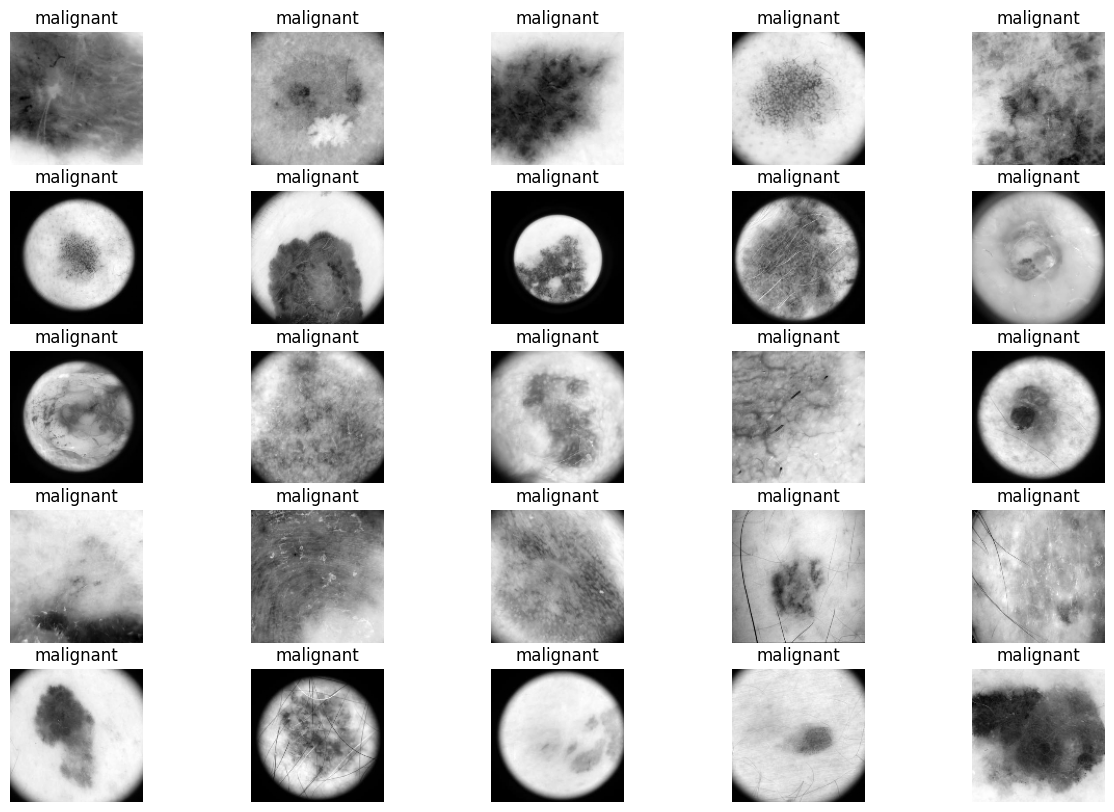

In [21]:
# Visualize some test images
plt.figure(figsize=(15, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title(f"{label_enc.inverse_transform([test_labels[i]])[0]}")
    plt.axis("off")
plt.show()

In [22]:
# Define the CNN model
model1 = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 1), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Conv2D(256, (3, 3), activation="relu"),
    MaxPool2D((2, 2)),

    Flatten(),
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid")
])

model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,359,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,747,649 (10.48 MB)

 Trainable params: 2,747,649 (10.48 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [24]:
# Train the CNN model
history1 = model1.fit(
    train_images, train_labels,
    validation_data=(test_images, test_labels),
    epochs=30
)


Epoch 1/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.6835 - loss: 0.5513 - val_accuracy: 0.8540 - val_loss: 0.3146
Epoch 2/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8399 - loss: 0.3434 - val_accuracy: 0.8710 - val_loss: 0.2866
Epoch 3/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8610 - loss: 0.3085 - val_accuracy: 0.8560 - val_loss: 0.3002
Epoch 4/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8561 - loss: 0.3046 - val_accuracy: 0.8780 - val_loss: 0.2645
Epoch 5/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8784 - loss: 0.2759 - val_accuracy: 0.8730 - val_loss: 0.2895
Epoch 6/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8838 - loss: 0.2584 - val_accuracy: 0.8860 - val_loss: 0.2665
Epoch 7/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9001 - loss: 0.2397 - val_accuracy: 0.8880 - val_loss: 0.2501
Epoch 8/30
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8979 - loss: 0.2360 - val

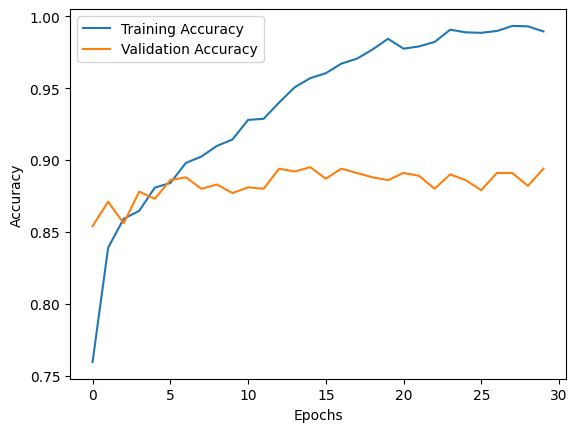

In [25]:
# Plot accuracy
plt.plot(history1.history["accuracy"], label="Training Accuracy")
plt.plot(history1.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

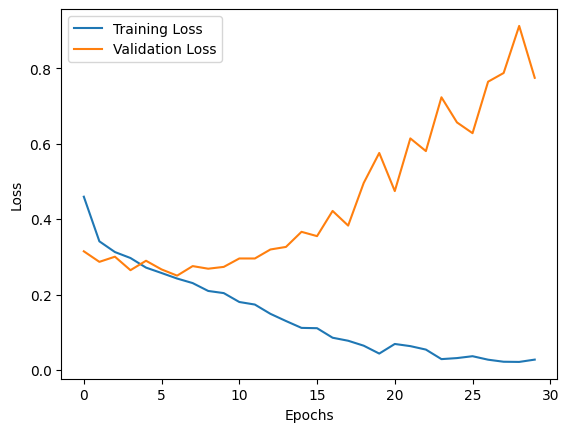

In [26]:
# Plot loss
plt.plot(history1.history["loss"], label="Training Loss")
plt.plot(history1.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [27]:
# Predict and evaluate
y_pred1 = model1.predict(test_images)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [28]:
y_pred1 = (y_pred1 > 0.5).astype(int).flatten()

In [30]:
print(classification_report(test_labels, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       500
           1       0.90      0.89      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



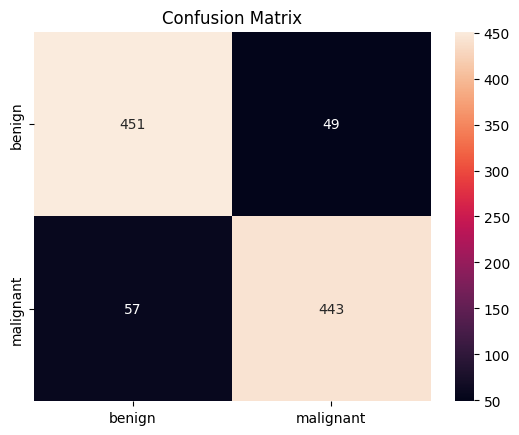

In [31]:
sns.heatmap(confusion_matrix(test_labels, y_pred1), fmt='g', annot=True, xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix")
plt.show()

In [32]:
# Train and evaluate SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(train_images.reshape(train_images.shape[0], -1), train_labels)

svm_pred = svm_model.predict(test_images.reshape(test_images.shape[0], -1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       500
           1       0.82      0.82      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



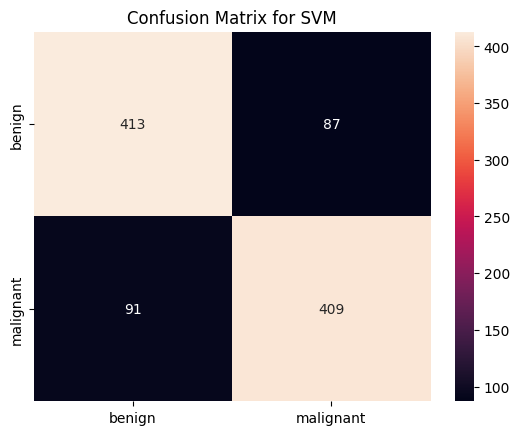

In [33]:
print(classification_report(test_labels, svm_pred))
sns.heatmap(confusion_matrix(test_labels, svm_pred), fmt='g', annot=True, xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix for SVM")
plt.show()

In [34]:
model1.save('/content/drive/My Drive/Melanoma_Dataset/melanoma_cnn_model.h5')

In [35]:
model1.save('/content/drive/My Drive/Melanoma_Dataset/melanoma_cnn_model.keras')

In [39]:
import joblib
joblib.dump(svm_model, '/content/drive/My Drive/Melanoma_Dataset/svm_model.pkl')

['/content/drive/My Drive/Melanoma_Dataset/svm_model.pkl']

In [36]:
from sklearn.metrics import classification_report

# CNN Metrics
cnn_report = classification_report(test_labels, y_pred1, output_dict=True)

# SVM Metrics
svm_report = classification_report(test_labels, svm_pred, output_dict=True)

print("CNN Performance Metrics:")
print(classification_report(test_labels, y_pred1))

print("SVM Performance Metrics:")
print(classification_report(test_labels, svm_pred))


CNN Performance Metrics:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       500
           1       0.90      0.89      0.89       500

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

SVM Performance Metrics:
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       500
           1       0.82      0.82      0.82       500

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000



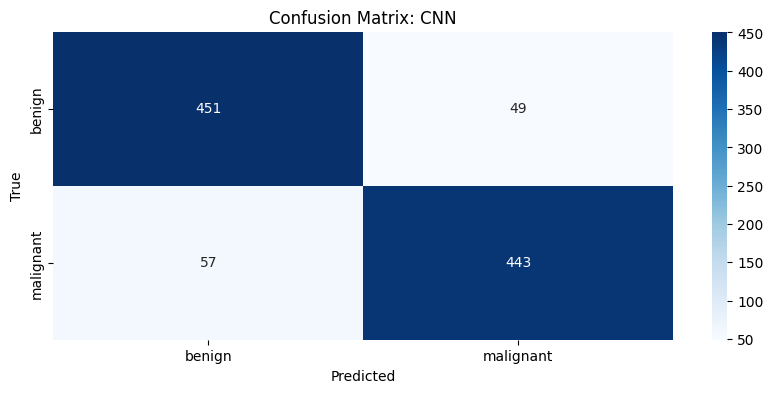

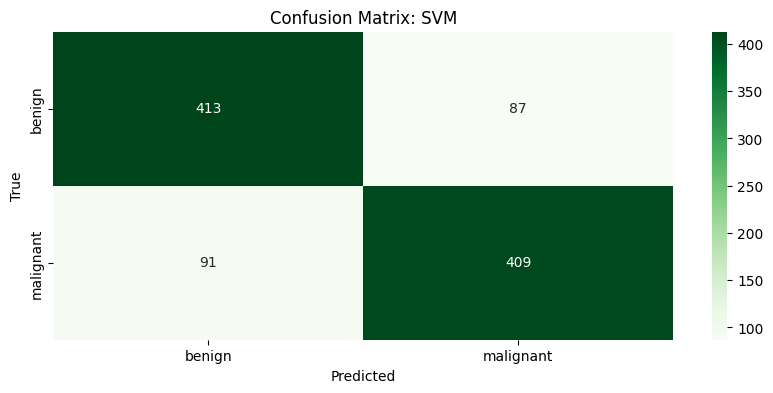

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# CNN Confusion Matrix
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(test_labels, y_pred1), annot=True, fmt='g', cmap='Blues',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix: CNN")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# SVM Confusion Matrix
plt.figure(figsize=(10, 4))
sns.heatmap(confusion_matrix(test_labels, svm_pred), annot=True, fmt='g', cmap='Greens',
            xticklabels=label_enc.classes_, yticklabels=label_enc.classes_)
plt.title("Confusion Matrix: SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

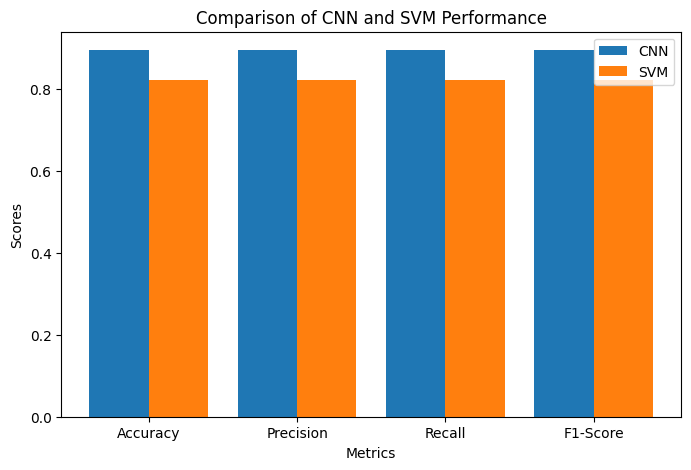

In [38]:
import matplotlib.pyplot as plt

# Extract metrics
cnn_accuracy = cnn_report['accuracy']
svm_accuracy = svm_report['accuracy']

cnn_precision = cnn_report['weighted avg']['precision']
svm_precision = svm_report['weighted avg']['precision']

cnn_recall = cnn_report['weighted avg']['recall']
svm_recall = svm_report['weighted avg']['recall']

cnn_f1 = cnn_report['weighted avg']['f1-score']
svm_f1 = svm_report['weighted avg']['f1-score']

# Bar plot for comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
cnn_scores = [cnn_accuracy, cnn_precision, cnn_recall, cnn_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, cnn_scores, width=0.4, label='CNN', align='center')
plt.bar([p + 0.4 for p in x], svm_scores, width=0.4, label='SVM', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of CNN and SVM Performance')
plt.legend()
plt.show()


In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# CNN Metrics
cnn_precision = precision_score(test_labels, y_pred1)
cnn_recall = recall_score(test_labels, y_pred1)
cnn_f1 = f1_score(test_labels, y_pred1)
cnn_roc_auc = roc_auc_score(test_labels, y_pred1)

# SVM Metrics
svm_precision = precision_score(test_labels, svm_pred)
svm_recall = recall_score(test_labels, svm_pred)
svm_f1 = f1_score(test_labels, svm_pred)
svm_roc_auc = roc_auc_score(test_labels, svm_pred)

# Print metrics
print(f"CNN - Precision: {cnn_precision}, Recall: {cnn_recall}, F1-Score: {cnn_f1}, ROC-AUC: {cnn_roc_auc}")
print(f"SVM - Precision: {svm_precision}, Recall: {svm_recall}, F1-Score: {svm_f1}, ROC-AUC: {svm_roc_auc}")


CNN - Precision: 0.9004065040650406, Recall: 0.886, F1-Score: 0.8931451612903226, ROC-AUC: 0.894
SVM - Precision: 0.8245967741935484, Recall: 0.818, F1-Score: 0.821285140562249, ROC-AUC: 0.8220000000000001


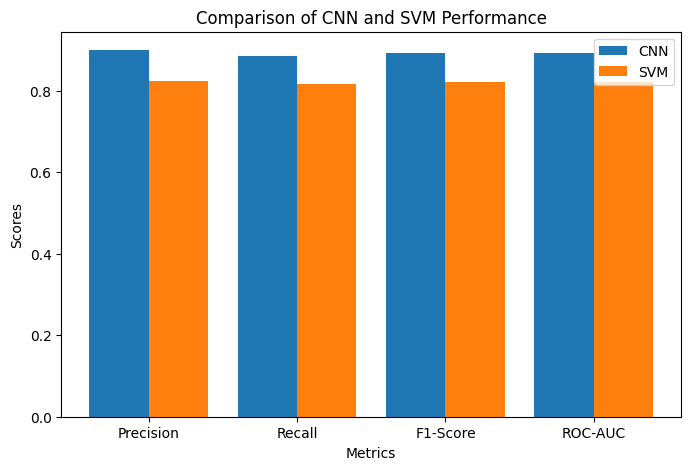

In [41]:
# Metrics for visualization
metrics = ['Precision', 'Recall', 'F1-Score', 'ROC-AUC']
cnn_scores = [cnn_precision, cnn_recall, cnn_f1, cnn_roc_auc]
svm_scores = [svm_precision, svm_recall, svm_f1, svm_roc_auc]

# Plot metrics comparison
import matplotlib.pyplot as plt
x = range(len(metrics))
plt.figure(figsize=(8, 5))
plt.bar(x, cnn_scores, width=0.4, label='CNN', align='center')
plt.bar([p + 0.4 for p in x], svm_scores, width=0.4, label='SVM', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Comparison of CNN and SVM Performance')
plt.legend()
plt.show()


In [42]:
from sklearn.metrics import confusion_matrix

# CNN Confusion Matrix
cnn_cm = confusion_matrix(test_labels, y_pred1)
cnn_tp, cnn_fn, cnn_fp, cnn_tn = cnn_cm[1][1], cnn_cm[1][0], cnn_cm[0][1], cnn_cm[0][0]

# SVM Confusion Matrix
svm_cm = confusion_matrix(test_labels, svm_pred)
svm_tp, svm_fn, svm_fp, svm_tn = svm_cm[1][1], svm_cm[1][0], svm_cm[0][1], svm_cm[0][0]

print(f"CNN - TP: {cnn_tp}, FN: {cnn_fn}, FP: {cnn_fp}, TN: {cnn_tn}")
print(f"SVM - TP: {svm_tp}, FN: {svm_fn}, FP: {svm_fp}, TN: {svm_tn}")


CNN - TP: 443, FN: 57, FP: 49, TN: 451
SVM - TP: 409, FN: 91, FP: 87, TN: 413


In [43]:
import time

# CNN Inference Time
start_time = time.time()
cnn_predictions = model1.predict(test_images)
cnn_time = time.time() - start_time

# SVM Inference Time
start_time = time.time()
svm_predictions = svm_model.predict(test_images.reshape(test_images.shape[0], -1))
svm_time = time.time() - start_time

print(f"CNN Inference Time: {cnn_time:.4f} seconds")
print(f"SVM Inference Time: {svm_time:.4f} seconds")


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN Inference Time: 0.4934 seconds
SVM Inference Time: 66.7654 seconds


In [44]:
print(f"Number of Trainable Parameters in CNN: {model1.count_params()}")


Number of Trainable Parameters in CNN: 2747649


In [45]:
import psutil

# Monitor memory usage during SVM inference
start_mem = psutil.virtual_memory().used
svm_predictions = svm_model.predict(test_images.reshape(test_images.shape[0], -1))
end_mem = psutil.virtual_memory().used
print(f"SVM Memory Usage: {(end_mem - start_mem) / 1024:.2f} KB")

# Monitor memory usage during CNN inference
start_mem = psutil.virtual_memory().used
cnn_predictions = model1.predict(test_images)
end_mem = psutil.virtual_memory().used
print(f"CNN Memory Usage: {(end_mem - start_mem) / 1024:.2f} KB")


SVM Memory Usage: 4152.00 KB
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
CNN Memory Usage: -27136.00 KB


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


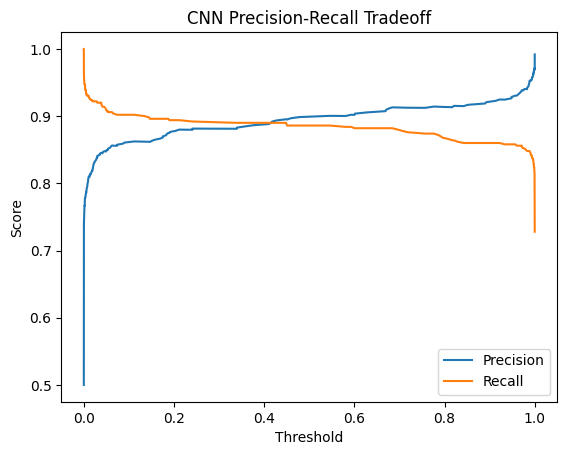

In [46]:
from sklearn.metrics import precision_recall_curve

# CNN Threshold Optimization
cnn_probs = model1.predict(test_images).flatten()
precision, recall, thresholds = precision_recall_curve(test_labels, cnn_probs)

plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('CNN Precision-Recall Tradeoff')
plt.legend()
plt.show()


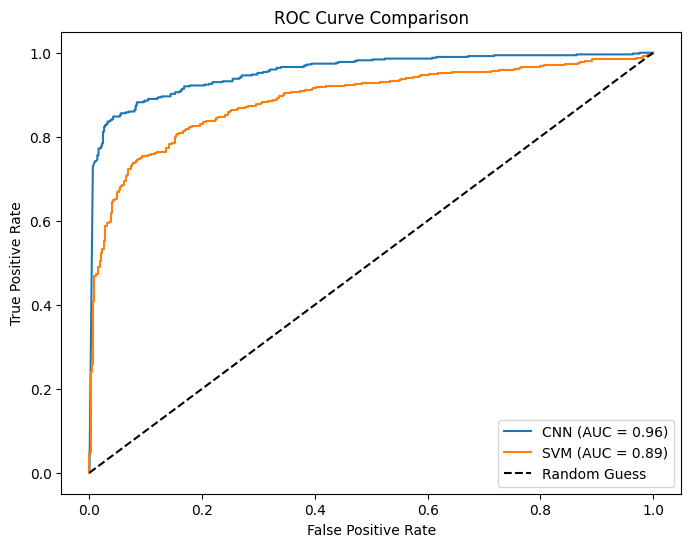

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# CNN ROC Curve
cnn_fpr, cnn_tpr, _ = roc_curve(test_labels, cnn_probs)
cnn_auc = roc_auc_score(test_labels, cnn_probs)

# SVM ROC Curve
svm_probs = svm_model.decision_function(test_images.reshape(test_images.shape[0], -1))
svm_fpr, svm_tpr, _ = roc_curve(test_labels, svm_probs)
svm_auc = roc_auc_score(test_labels, svm_probs)

# Plot ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(cnn_fpr, cnn_tpr, label=f'CNN (AUC = {cnn_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, label=f'SVM (AUC = {svm_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


In [48]:
# CNN Misclassified Samples
cnn_misclassified = np.where(y_pred1 != test_labels)[0]
print(f"Number of CNN Misclassified Samples: {len(cnn_misclassified)}")

# SVM Misclassified Samples
svm_misclassified = np.where(svm_pred != test_labels)[0]
print(f"Number of SVM Misclassified Samples: {len(svm_misclassified)}")


Number of CNN Misclassified Samples: 106
Number of SVM Misclassified Samples: 178


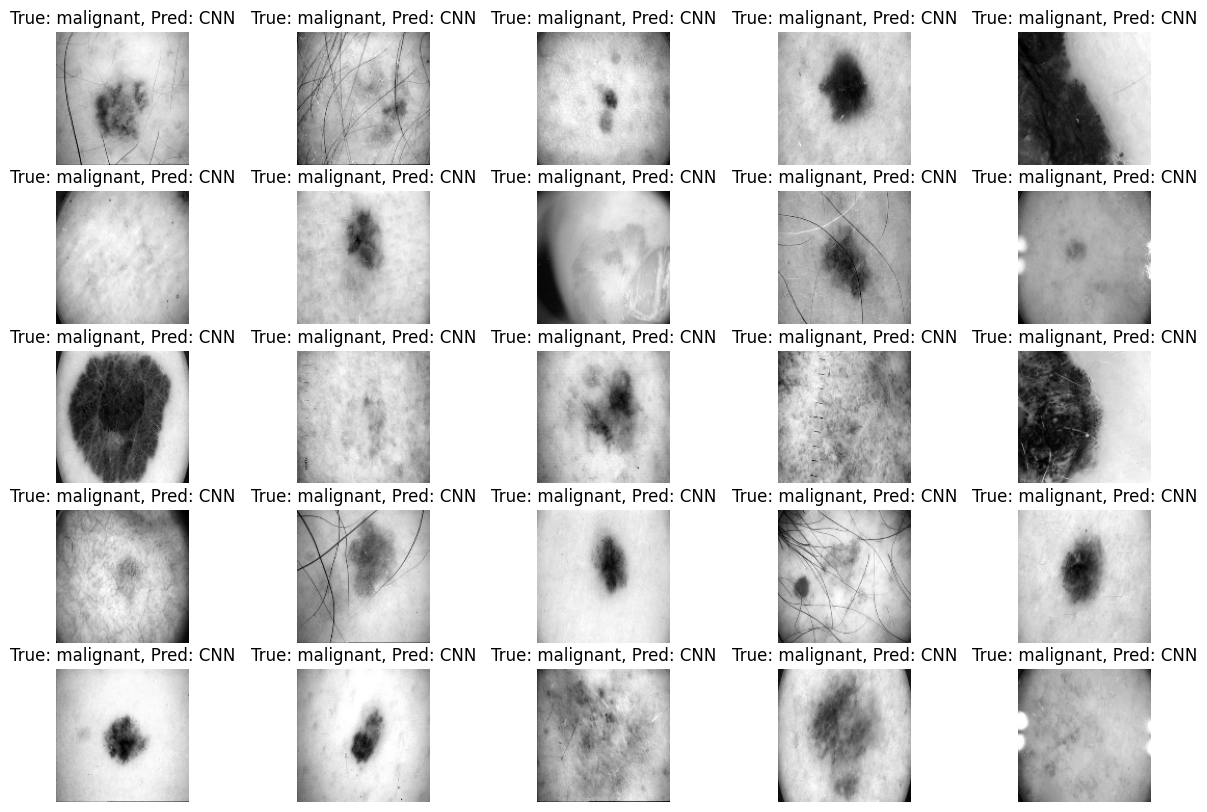

In [49]:
plt.figure(figsize=(15, 10))
for i, idx in enumerate(cnn_misclassified[:25]):  # Limit to 25 for visualization
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx].squeeze(), cmap='gray')
    plt.title(f"True: {label_enc.inverse_transform([test_labels[idx]])[0]}, Pred: CNN")
    plt.axis("off")
plt.show()


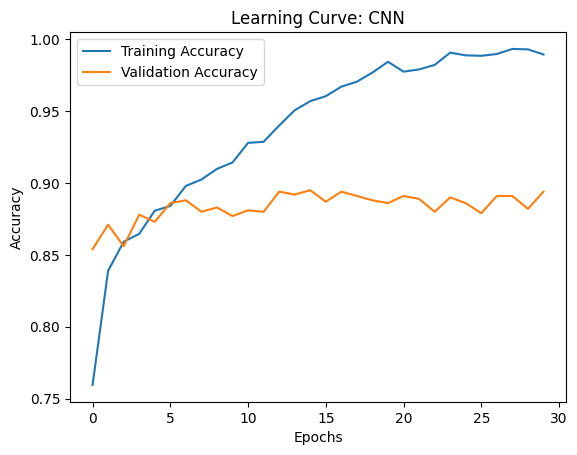

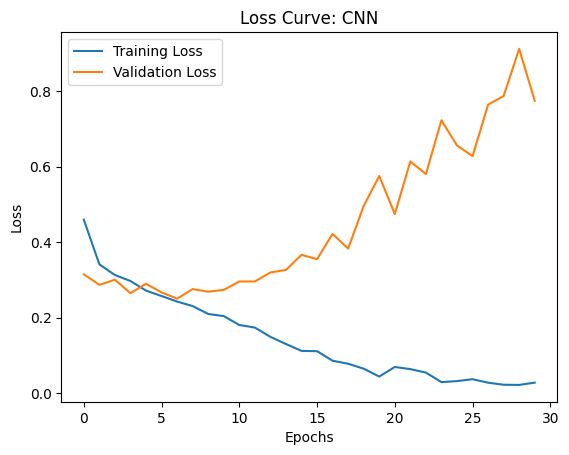

In [50]:
# Plot Training vs. Validation Accuracy
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve: CNN')
plt.legend()
plt.show()

# Plot Training vs. Validation Loss
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve: CNN')
plt.legend()
plt.show()
